In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
datos_dane = pd.read_csv('./Documentation/Data/archivos-dane/datos_dane.csv')
datos_dane.head(5)

,DIRECTORIO,NOMBRE_LOCALIDAD,NOMBRE_ESTRATO,NVCBP4,NVCBP14A,NVCBP14D,NVCBP14E,NVCBP14G,NVCBP15A,NVCBP15C,...,NHCLP5,NHCLP8AB,NHCLP8AE,NHCLP10,NHCLP11,NHCLP29_1A,NHCLP29_1C,NHCLP29_1E,NHCLP29_1F,NPCHP4
0,3004368.0,Usaquén,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,2,2,2,2,2,2,...,1,NaN,NaN,2,2,NaN,NaN,NaN,NaN,9.0
1,3004369.0,Usaquén,Usaquén,1,2,2,2,2,2,2,...,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,11.0
2,3004375.0,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,2,2,2,2,2,2,1,...,2,NaN,NaN,2,2,NaN,NaN,1.0,NaN,11.0
3,3004380.0,Usaquén,Los Cedros,1,2,2,2,2,2,2,...,1,NaN,NaN,3,2,NaN,NaN,NaN,NaN,9.0
4,3004383.0,Fontibón,Ciudad Salitre Occidental,1,2,2,2,2,1,2,...,2,NaN,NaN,2,2,NaN,NaN,NaN,NaN,11.0


In [18]:
datos_dane.shape

(9857, 55)

In [19]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DIRECTORIO        9857 non-null   float64
 1   NOMBRE_LOCALIDAD  9857 non-null   object 
 2   NOMBRE_ESTRATO    9857 non-null   object 
 3   NVCBP4            9857 non-null   int64  
 4   NVCBP14A          9857 non-null   int64  
 5   NVCBP14D          9857 non-null   int64  
 6   NVCBP14E          9857 non-null   int64  
 7   NVCBP14G          9857 non-null   int64  
 8   NVCBP15A          9857 non-null   int64  
 9   NVCBP15C          9857 non-null   int64  
 10  NVCBP15F          9857 non-null   int64  
 11  NVCBP15G          9857 non-null   int64  
 12  NVCBP16A3         9857 non-null   int64  
 13  NVCBP16A4         9857 non-null   int64  
 14  NPCKP17           9857 non-null   float64
 15  NPCKP18           9857 non-null   float64
 16  NPCKP23           9558 non-null   float64


In [20]:
# RENOMBRAMOS LAS COLUMNAS PARA IDENTIFICAR MEJOR LOS DATOS O LAS COLUMNAS

dic_dane = {
        'NVCBP4':'CONJUNTO_CERRADO',
        'NVCBP14A':'FABRICAS_CERCA', 'NVCBP14D':'TERMINALES_BUS', 'NVCBP14E':'BARES_DISCO', 
        'NVCBP14G':'OSCURO_PELIGROSO', 'NVCBP15A':'RUIDO', 'NVCBP15C':'INSEGURIDAD',
        'NVCBP15F':'BASURA_INADECUADA', 'NVCBP15G':'INVASION','NVCBP16A3':'MOV_ADULTOS_MAYORES', 
        'NVCBP16A4':'MOV_NINOS_BEBES',
        'NPCKP17':'OCUPACION','NPCKP18':'CONTRATO','NPCKP23':'SALARIO_MES', 
        'NPCKP44A':'DONDE_TRABAJA', 'NPCKPN62A':'DECLARACION_RENTA', 
        'NPCKPN62B':'VALOR_DECLARACION', 'NPCKP64A':'PERDIDA_TRABAJO_C19', 
        'NPCKP64E':'PERDIDA_INGRESOS_C19',
        'NHCCP3':'TIENE_ESCRITURA', 'NHCCP6':'ANO_COMPRA', 'NHCCP7':'VALOR_COMPRA', 'NHCCP8_1':'HIPOTECA_CRED_BANCO',
        'NHCCP8_2':'OTRO_CRED_BANCO', 'NHCCP8_3':'CRED_FNA', 'NHCCP8_6':'PRESTAMOS_AMIGOS',
        'NHCCP8_7':'CESANTIAS', 'NHCCP8_8':'AHORROS', 'NHCCP8_9':'SUBSIDIOS',
        'NHCCP9':'CUANTO_PAGARIA_MENSUAL', 'NHCCP11':'PLANES_ADQUIRIR_VIVIENDA', 
        'NHCCP11A':'MOTIVO_COMPRA', 'NHCCP12':'RAZON_NO_ADQ_VIV', 'NHCCP41':'TIENE_CARRO','NHCCP41A':'CUANTOS_CARROS',
        'NHCCP47A':'TIENE_PERROS', 'NHCCP47B':'TIENE_GATOS', 'NHCLP2A':'VICTIMA_ATRACO', 'NHCLP2B':'VICTIMA_HOMICIDIO', 
        'NHCLP2C':'VICTIMA_PERSECUSION',
        'NHCLP2E':'VICTIMA_ACOSO', 'NHCLP4':'COMO_VIVE_ECON', 'NHCLP5':'COMO_NIVEL_VIDA', 
        'NHCLP8AB':'REACCION_OPORTUNA_POLICIA', 'NHCLP8AE':'COMO_TRANSPORTE_URBANO', 'NHCLP10':'SON_INGRESOS_SUFICIENTES',
        'NHCLP11':'SE_CONSIDERA_POBRE', 'NHCLP29_1A':'MED_C19_TRABAJO', 
        'NHCLP29_1C':'MED_C19_CAMBIO_VIVIENDA', 'NHCLP29_1E':'MED_C19_ENDEUDAMIENTO', 
        'NHCLP29_1F':'MED_C19_VENTA_BIENES','NPCHP4':'NIVEL_EDUCATIVO'
}

datos_dane = datos_dane.rename(columns=dic_dane)
datos_dane.columns

Index(['DIRECTORIO', 'NOMBRE_LOCALIDAD', 'NOMBRE_ESTRATO', 'CONJUNTO_CERRADO',
       'FABRICAS_CERCA', 'TERMINALES_BUS', 'BARES_DISCO', 'OSCURO_PELIGROSO',
       'RUIDO', 'INSEGURIDAD', 'BASURA_INADECUADA', 'INVASION',
       'MOV_ADULTOS_MAYORES', 'MOV_NINOS_BEBES', 'OCUPACION', 'CONTRATO',
       'SALARIO_MES', 'DONDE_TRABAJA', 'DECLARACION_RENTA',
       'VALOR_DECLARACION', 'PERDIDA_TRABAJO_C19', 'PERDIDA_INGRESOS_C19',
       'TIENE_ESCRITURA', 'ANO_COMPRA', 'VALOR_COMPRA', 'HIPOTECA_CRED_BANCO',
       'OTRO_CRED_BANCO', 'CRED_FNA', 'PRESTAMOS_AMIGOS', 'CESANTIAS',
       'AHORROS', 'SUBSIDIOS', 'CUANTO_PAGARIA_MENSUAL',
       'PLANES_ADQUIRIR_VIVIENDA', 'MOTIVO_COMPRA', 'RAZON_NO_ADQ_VIV',
       'TIENE_CARRO', 'CUANTOS_CARROS', 'TIENE_PERROS', 'TIENE_GATOS',
       'VICTIMA_ATRACO', 'VICTIMA_HOMICIDIO', 'VICTIMA_PERSECUSION',
       'VICTIMA_ACOSO', 'COMO_VIVE_ECON', 'COMO_NIVEL_VIDA',
       'REACCION_OPORTUNA_POLICIA', 'COMO_TRANSPORTE_URBANO',
       'SON_INGRESOS_SUFICIE

In [21]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DIRECTORIO                 9857 non-null   float64
 1   NOMBRE_LOCALIDAD           9857 non-null   object 
 2   NOMBRE_ESTRATO             9857 non-null   object 
 3   CONJUNTO_CERRADO           9857 non-null   int64  
 4   FABRICAS_CERCA             9857 non-null   int64  
 5   TERMINALES_BUS             9857 non-null   int64  
 6   BARES_DISCO                9857 non-null   int64  
 7   OSCURO_PELIGROSO           9857 non-null   int64  
 8   RUIDO                      9857 non-null   int64  
 9   INSEGURIDAD                9857 non-null   int64  
 10  BASURA_INADECUADA          9857 non-null   int64  
 11  INVASION                   9857 non-null   int64  
 12  MOV_ADULTOS_MAYORES        9857 non-null   int64  
 13  MOV_NINOS_BEBES            9857 non-null   int64

In [22]:
# AGRUPAMSO POR BARRIO ALGUNAS DE ESTAS COLUMNAS
# Y TAMBIEN CALCULAMOS EL PROMEDIO DE LAS MISMAS
datos_dane.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO',
                                    'OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19',
                                    'PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean()

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,1.893333,1.186667,1.853333,1.893333,1.560000,1.840000,1.493860e+06,1.160000,1.920000,1.680000,1.800000
Américas,1.383178,1.252336,1.981308,1.785047,1.607477,1.915888,2.672138e+06,1.056075,1.971963,1.719626,1.850467
Apogeo,1.650794,1.301587,1.746032,1.936508,1.682540,2.000000,1.837583e+06,1.079365,1.920635,1.650794,1.920635
Arborizadora,1.430108,1.301075,1.946237,1.881720,1.688172,1.838710,1.802297e+06,1.032258,1.881720,1.612903,1.817204
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,1.367347,1.326531,1.989796,1.979592,1.704082,1.867347,2.943731e+06,1.051020,1.948980,1.704082,1.938776
...,...,...,...,...,...,...,...,...,...,...,...
Usaquén,1.102564,1.782051,1.993590,1.974359,1.801282,1.993590,4.670897e+06,1.032051,1.980769,1.833333,1.878205
Venecia,1.527778,1.180556,1.763889,1.708333,1.500000,1.638889,2.078713e+06,1.166667,1.861111,1.597222,1.750000
Verbenal,1.228571,1.438095,1.923810,1.971429,1.752381,1.857143,2.445403e+06,1.133333,1.971429,1.733333,1.914286


In [23]:
# HACEMOS UN REPLACE DE LOS 2 POR 0, YA QUE EN EL SITIO OFICIAL DEL DANE 
# MUESTRA QUE LAS RESPUESTA PARA SI ERAN UN 1 Y LAS RESPUESTAS DE NO ERAN UN 2
# AHORA NUESTRO DATOS PARA SI SERAN 1 IGUALMENTE, PERO PARA NO SERÁN 0
datos = datos_dane[['NOMBRE_ESTRATO', 'CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO',
                                    'OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19',
                                    'PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].replace(2,0)
datos

,NOMBRE_ESTRATO,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,0,0,0,0,0,99.0,1.0,0,0,0
1,Usaquén,1,0,0,0,0,0,10000000.0,1.0,0,0,0
2,CHAPINERO: Pardo Rubio + Chapinero,0,1,0,0,0,0,4000000.0,1.0,0,1,0
3,Los Cedros,1,0,0,0,0,0,5000000.0,1.0,0,1,0
4,Ciudad Salitre Occidental,1,0,0,0,1,0,3500000.0,1.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9852,SANTA FE: Las Nieves + Sagrado Corazón,1,1,0,0,1,0,6000000.0,1.0,0,0,0
9853,SANTA FE: Las Nieves + Sagrado Corazón,0,1,0,1,1,0,1800000.0,1.0,0,0,0
9854,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,0,7200000.0,1.0,0,0,0
9855,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,0,99.0,1.0,0,1,0


In [24]:
# REALIZAMOS UN PROMEDIO DE NUESTRO NUEVO DATASET 
datos_tratados = datos.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO',
                                    'OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19',
                                    'PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean()
datos_tratados

# LOS VALORES MOSTRADOS SON EN &, EJEM: 4% --> 0,04

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,0.106667,0.813333,0.146667,0.106667,0.440000,0.160000,1.493860e+06,0.840000,0.080000,0.320000,0.200000
Américas,0.616822,0.747664,0.018692,0.214953,0.392523,0.084112,2.672138e+06,0.943925,0.028037,0.280374,0.149533
Apogeo,0.349206,0.698413,0.253968,0.063492,0.317460,0.000000,1.837583e+06,0.920635,0.079365,0.349206,0.079365
Arborizadora,0.569892,0.698925,0.053763,0.118280,0.311828,0.161290,1.802297e+06,0.967742,0.118280,0.387097,0.182796
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,0.632653,0.673469,0.010204,0.020408,0.295918,0.132653,2.943731e+06,0.948980,0.051020,0.295918,0.061224
...,...,...,...,...,...,...,...,...,...,...,...
Usaquén,0.897436,0.217949,0.006410,0.025641,0.198718,0.006410,4.670897e+06,0.967949,0.019231,0.166667,0.121795
Venecia,0.472222,0.819444,0.236111,0.291667,0.500000,0.361111,2.078713e+06,0.833333,0.138889,0.402778,0.250000
Verbenal,0.771429,0.561905,0.076190,0.028571,0.247619,0.142857,2.445403e+06,0.866667,0.028571,0.266667,0.085714


In [25]:
inmuebles = pd.read_csv('./Documentation/Data/inmuebles.csv')

In [27]:
# UNIMOS NUESTRAS COLUMNAS DEL DATASET inmuebles JUNTO CON EL DATASET datos_tratados
pd.merge(inmuebles, datos_tratados, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='left')

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.518519,0.014815,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,...,0.580645,0.118280,0.107527,0.344086,0.129032,2.794784e+06,0.935484,0.086022,0.301075,0.182796
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,...,0.223810,0.000000,0.047619,0.185714,0.019048,5.512356e+06,0.880952,0.033333,0.190476,0.066667
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,...,0.217949,0.006410,0.025641,0.198718,0.006410,4.670897e+06,0.967949,0.019231,0.166667,0.121795
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,...,0.418301,0.000000,0.019608,0.274510,0.006536,4.832843e+06,0.960784,0.019608,0.163399,0.091503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,$,290000000,...,0.614286,0.028571,0.171429,0.428571,0.085714,2.144186e+06,0.914286,0.071429,0.257143,0.185714
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,$,670000000,...,0.492537,0.022388,0.149254,0.417910,0.089552,4.177179e+06,0.925373,0.022388,0.119403,0.067164
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000,$,900000000,...,0.706897,0.034483,0.172414,0.465517,0.258621,2.356995e+06,0.896552,0.051724,0.224138,0.206897
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,$,335000000,...,0.869565,0.021739,0.108696,0.543478,0.130435,1.418653e+06,0.847826,0.021739,0.391304,0.065217


In [28]:
# GUARDAMOS EL DATASET EN UNA NUEVA VARIABLE QUE SERÁ USADA PARA NUESTRO MACHINE LEARNING
datos_ml = pd.merge(inmuebles, datos_tratados, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='left')
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9520 non-null   object 
 1   Descripcion               9520 non-null   object 
 2   Habitaciones              9520 non-null   int64  
 3   Banos                     9520 non-null   int64  
 4   Area                      9520 non-null   int64  
 5   Barrio                    9520 non-null   object 
 6   UPZ                       9478 non-null   object 
 7   Valor                     9520 non-null   object 
 8   Moneda                    9520 non-null   object 
 9   Precio                    9520 non-null   int64  
 10  Precio_Millon             9520 non-null   float64
 11  Valor_m2_Millon           9520 non-null   float64
 12  Valor_m2_Barrio           9520 non-null   float64
 13  CONJUNTO_CERRADO          9366 non-null   float64
 14  INSEGURI

In [29]:
# VAMOS A TRAER O HACER UN MERGE DEL CODIGO DE LA UPZ A NUESTRO DATASET DE datos_ml
upz = pd.read_csv('./Documentation/Data/archivos-dane/cod_upz.csv')
datos_ml = pd.merge(datos_ml, upz, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='inner')
datos_ml

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,...,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,$,300000000,...,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
2,Casa,Casa en venta en Zona Noroccidental,3,4,300,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.519.000.000,$,2519000000,...,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
3,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,$,239000000,...,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
4,Casa,Casa en venta en Zona Noroccidental,3,6,380,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.600.000.000,$,1600000000,...,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,Apartamento,Apartamento en venta en Verbenal,2,2,48,Verbenal,Verbenal,$ 250.000.000,$,250000000,...,0.028571,0.247619,0.142857,2.445403e+06,0.866667,0.028571,0.266667,0.085714,Verbenal,9.0
9314,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000,...,0.028571,0.247619,0.142857,2.445403e+06,0.866667,0.028571,0.266667,0.085714,Verbenal,9.0
9315,Apartamento,Apartamento en venta en Verbenal,2,1,38,Verbenal,Verbenal,$ 180.000.000,$,180000000,...,0.028571,0.247619,0.142857,2.445403e+06,0.866667,0.028571,0.266667,0.085714,Verbenal,9.0
9316,Apartamento,Apartamento en venta en Verbenal,2,1,48,Verbenal,Verbenal,$ 240.000.000,$,240000000,...,0.028571,0.247619,0.142857,2.445403e+06,0.866667,0.028571,0.266667,0.085714,Verbenal,9.0


In [31]:
# EVIDENCIAMOS QUE NUESTRO DATASET ESTA SIN DATOS NULOS
# LO CUAL AYUDA MUCHO A MANEJAR LOS DATOS A LA HORA DE MANIPULAR 
# O TRABAJAR TODO LO REFERENTE A MACHINE LEARNING
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9318 entries, 0 to 9317
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9318 non-null   object 
 1   Descripcion               9318 non-null   object 
 2   Habitaciones              9318 non-null   int64  
 3   Banos                     9318 non-null   int64  
 4   Area                      9318 non-null   int64  
 5   Barrio                    9318 non-null   object 
 6   UPZ                       9318 non-null   object 
 7   Valor                     9318 non-null   object 
 8   Moneda                    9318 non-null   object 
 9   Precio                    9318 non-null   int64  
 10  Precio_Millon             9318 non-null   float64
 11  Valor_m2_Millon           9318 non-null   float64
 12  Valor_m2_Barrio           9318 non-null   float64
 13  CONJUNTO_CERRADO          9318 non-null   float64
 14  INSEGURI

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


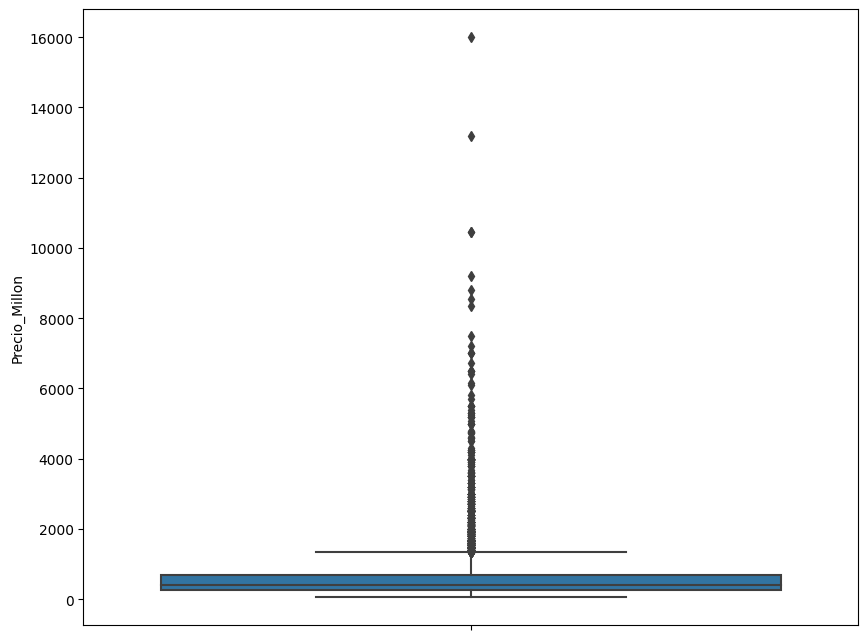

In [33]:
# GRAFICAMOs ESTE MUEVO DATASET datos_ml

plt.figure(figsize=(10, 8))
sns.boxplot(data=datos_ml, y='Precio_Millon')
plt.show()

In [35]:
# SEGUN EL GRAFICO PODEMOS DECIR QUE HAY VARIOS OUTLAYERS 
# POR ESO ESTABLECIMOS ESTA CONDICION PARA VER CUANTOS DATOS 
# NO SERÁN REFLEJADOS Y SI NOS AYUDA EN NUESTRO DIAGRAMA O NO.
datos_ml.query('Precio_Millon > 5000 | Precio_Millon < 60')

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
207,Apartamento,Apartamento en venta en Chapinero,3,5,476,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 8.550.000.000,$,8550000000,...,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
323,Local,Local en venta en Chapinero,16,9,650,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 5.800.000.000,$,5800000000,...,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
702,Casa,Casa en venta en Chapinero,4,4,462,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 5.200.000.000,$,5200000000,...,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
708,Casa,Casa en venta en Chapinero,12,2,769,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 6.160.000.000,$,6160000000,...,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
829,Apartamento,Apartamento en venta en Zona Noroccidental,4,7,550,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 7.200.000.000,$,7200000000,...,0.229630,0.348148,0.125926,4.034788e+06,0.903704,0.037037,0.281481,0.088889,CHAPINERO: Pardo Rubio + Chapinero,816.0
1371,Apartamento,Apartamento en venta en El Chicó,4,5,555,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 6.100.000.000,$,6100000000,...,0.047619,0.185714,0.019048,5.512356e+06,0.880952,0.033333,0.190476,0.066667,CHAPINERO: Chicó Lago + El Refugio,817.0
1414,Apartamento,Apartamento en venta en El Chicó,3,5,1550,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 13.200.000.000,$,13200000000,...,0.047619,0.185714,0.019048,5.512356e+06,0.880952,0.033333,0.190476,0.066667,CHAPINERO: Chicó Lago + El Refugio,817.0
1429,Local,Local en venta en Quinta Camacho,16,9,1050,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 5.299.999.744,$,5299999744,...,0.047619,0.185714,0.019048,5.512356e+06,0.880952,0.033333,0.190476,0.066667,CHAPINERO: Chicó Lago + El Refugio,817.0
1442,Local,Local en venta en Quinta Camacho,16,9,1050,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 5.299.999.744,$,5299999744,...,0.047619,0.185714,0.019048,5.512356e+06,0.880952,0.033333,0.190476,0.066667,CHAPINERO: Chicó Lago + El Refugio,817.0
1518,Apartamento,Apartamento en venta en Chico Reservado,4,5,378,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 6.500.000.000,$,6500000000,...,0.047619,0.185714,0.019048,5.512356e+06,0.880952,0.033333,0.190476,0.066667,CHAPINERO: Chicó Lago + El Refugio,817.0


c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


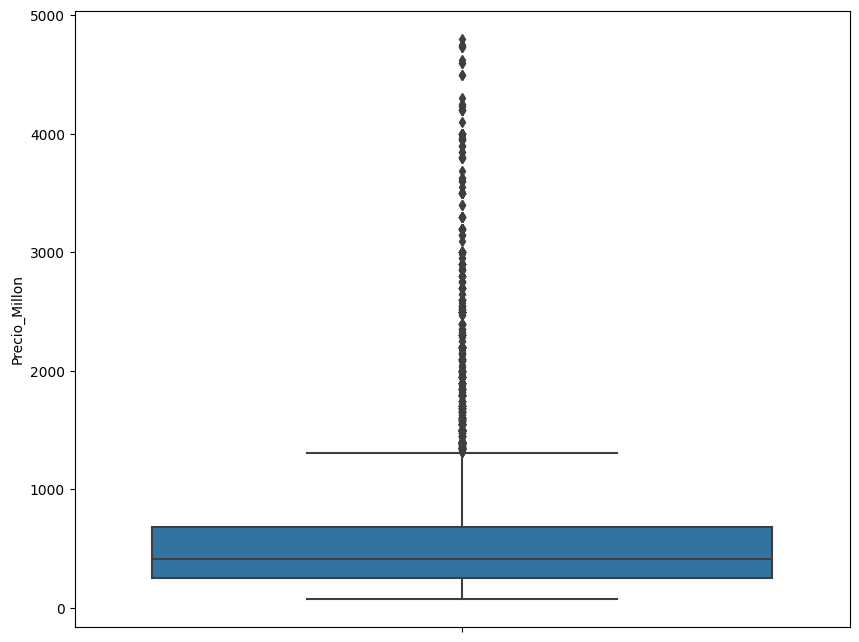

In [37]:
datos_ml = datos_ml.query('Precio_Millon < 5000 & Precio_Millon > 60')
plt.figure(figsize=(10, 8))
sns.boxplot(data=datos_ml, y='Precio_Millon')
plt.show()

In [38]:
# VAMOS A PONER MAS CONDICIONES PARA MOSTRAR EN EL GRAFICO PARA ELLO:

datos_ml['SALARIO_ANUAL_MI'] = datos_ml['SALARIO_MES']*12/1000000
datos_ml['SALARIO_ANUAL_MI']

0       48.417456
1       48.417456
2       48.417456
3       48.417456
4       48.417456
          ...    
9313    29.344838
9314    29.344838
9315    29.344838
9316    29.344838
9317    29.344838
Name: SALARIO_ANUAL_MI, Length: 9277, dtype: float64

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


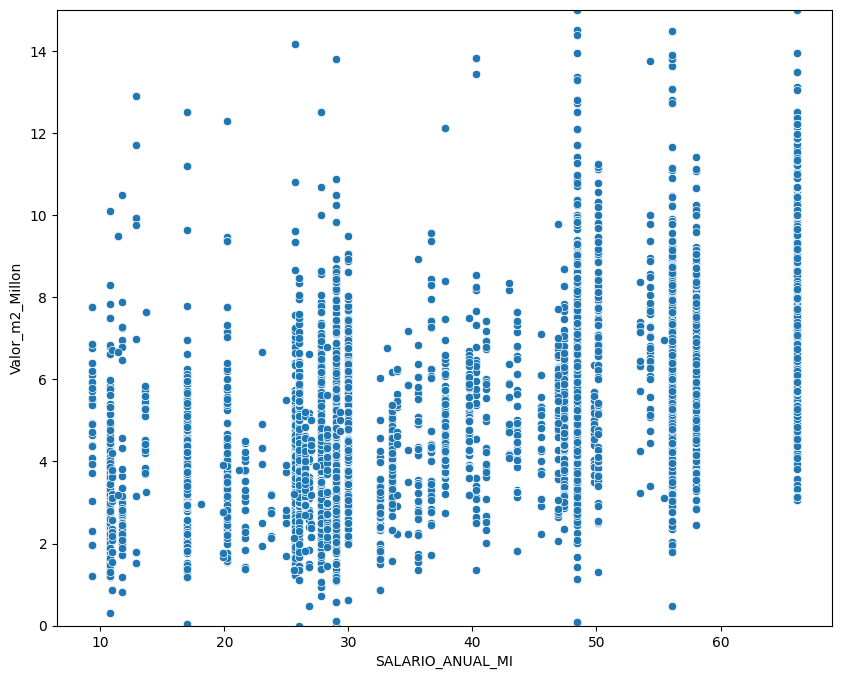

In [39]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=datos_ml, x='SALARIO_ANUAL_MI', y='Valor_m2_Millon')
plt.ylim((0, 15))
plt.show()